### Dependencies

In [1]:
import matplotlib as mpl
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

new_rc_paramas = {
    'text.usetex' : True,
    'figure.dpi' : 180,
    'text.latex.preamble' : r'\usepackage{libertine}'r'\usepackage{libertinust1math}',
    'font.family' : 'Linux Libertine',
    'axes.titlesize' : 22,
    'axes.labelsize' : 18,
    'xtick.labelsize' : 16,
    'ytick.labelsize' : 16,
    'xtick.direction' : 'in',
    'ytick.direction' : 'in',
    'xtick.top' : True,
    'ytick.right' : True,
    'legend.fontsize' : 'large',
    'axes.linewidth' : 1.2,
    'savefig.bbox' : 'tight',
    'image.aspect' : 'equal',
}

Oh2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^2)$')
Oh3 = mlines.Line2D([], [], color='black', linestyle="-.", label=r'$\mathcal{O}(h^3)$')
Oh1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h)$')
Ohneg2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-2})$')
Ohneg1 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(h^{-1})$')
Odt = mlines.Line2D([], [], color='black', linestyle="--", label=r'$\mathcal{O}(\Delta t)$')
Odt2 = mlines.Line2D([], [], color='black', linestyle="-", label=r'$\mathcal{O}(\Delta t^2)$')
tau1 = mlines.Line2D([], [], color='C4', linestyle="--", label=r'$\tau_0 = \tau_1 = 1$')
tau10neg4 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-4}$')
tau10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 1\cdot 10^{-3}$')
tau3x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-3}$')
tau5x10neg3 = mlines.Line2D([], [], color='C0', linestyle="-", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-3}$')
tau3x10neg4 = mlines.Line2D([], [], color='C2', linestyle="-.", label=r'$\tau_0 = \tau_1 = 3\cdot 10^{-4}$')
tau5x10neg4 = mlines.Line2D([], [], color='C3', linestyle=":", label=r'$\tau_0 = \tau_1 = 5\cdot 10^{-4}$')

conservative = mlines.Line2D([0], [0], marker='None', color='black', linestyle=":", label='Conservative')
classical = mlines.Line2D([0], [0], marker='None', color='black', linestyle=(0, (5,7)), label='Non-conservative')


space = mlines.Line2D([0], [0], marker='None', color='None', linestyle="None", label=' ')

circle = mlines.Line2D([0], [0], marker='o', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Full stabilization.')
                          
star = mlines.Line2D([], [], color='black', marker='*',
                          markersize=9,linestyle="None",
                        markeredgewidth=0.8, markerfacecolor="None", 
                        label='Macro stabilization.')

triangle = mlines.Line2D([0], [0], marker='^', color='black', 
                          markersize=9, markerfacecolor="None", 
                          linestyle="None", markeredgewidth=0.8,
                           label='Macro stab. 2')


mpl.rcParams.update(new_rc_paramas)

import numpy as np

def convergence_rate(errors, mesh_sizes):
    if len(errors) < 2 or len(mesh_sizes) < 2 or len(errors) != len(mesh_sizes):
        raise ValueError("At least two errors and mesh sizes are required.")

    # Take logarithm of errors and mesh sizes
    log_errors = np.log(errors)
    log_mesh_sizes = np.log(mesh_sizes)

    # Compute differences between consecutive elements
    delta_errors = np.diff(log_errors)
    delta_mesh_sizes = np.diff(log_mesh_sizes)

    # Compute convergence rate
    convergence_rates = delta_errors / delta_mesh_sizes

    return convergence_rates


### Stationary vortex

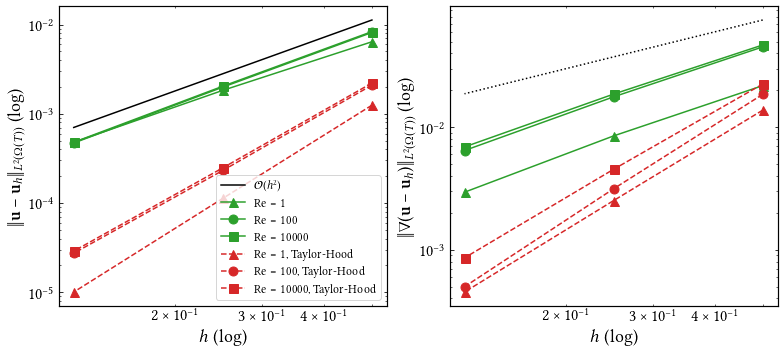

In [2]:
### nu = 1

# Re = 1

error_u_re1 = [0.006048432165414336, 0.001756829086108918, 0.0004696049465535104]
error_p_re1 = [0.1920056996711667, 0.09682646989778407, 0.04828879456640561]
div_error_re1 = [7.771561172376096e-16, 2.664535259100376e-15, 6.661338147750939e-15]

error_u_re100 = [0.6045040601291177, 0.1756426465625965, 0.04695882876659266]   # with non-zero rhs
error_p_re100 = [19.20708472264689, 9.682981260896653, 4.828888932873408]
div_error_re100 = [9.992007221626409e-16, 2.664535259100376e-15, 7.105427357601002e-15]

error_u_re1_th = [0.002860542808320891, 0.0003648531653440462, 4.566199784137853e-05]
error_p_re1_th = [0.03090994787410668, 0.007178945508482006, 0.001723805788554178]
div_error_re1_th = [0.0106690350754842, 0.002216291221034838, 0.0004955443741785359]

error_u_re100_th = [0.002860542808320891, 0.0003648531653440462, 4.566199784137853e-05]
error_p_re100_th = [41.76079725808144, 41.7447013410484, 41.74241059032556]
div_error_re100_th = [0.01020473005982991, 0.002167818713579683, 0.0004879415450251834]



# solving dt(u) + (u*nabla)u - 1/Re*delta u + 1/Re*nabla p = 0
error_u_re1 = [0.006415205195438083, 0.001831942655683693, 0.0004800030864941829]
error_p_re1 = [0.1900926670517916, 0.09596564185190988, 0.0481436800338862]
grad_error_re1 = [0.02183897067826361, 0.008491658619402726, 0.002947634734104631]
div_error_re1 = [1.221245327087672e-15, 2.664535259100376e-15, 7.993605777301127e-15]

error_u_re100 = [0.1795909951103472, 0.06987225767189932, 0.02690461249154361]
error_p_re100 = [25.73806787694349, 17.20798888730964, 10.58131895416084]
div_error_re100 = [1.665334536937735e-15, 2.664535259100376e-15, 8.881784197001252e-15]

# scaling lambda_boundary with Re
error_u_re100 = [0.008155231550893821, 0.001991275533435159, 0.0004706966886950976]
error_p_re100 = [19.02099870174366, 9.639363451664172, 4.833565406461698]
grad_error_re100 = [0.04523498743030731, 0.01769610578414767, 0.006451164882907099]
div_error_re100 = [1.554312234475219e-15, 5.440092820663267e-15, 1.243449787580175e-14]

error_u_re10000 = [0.0083413237136328, 0.002038313520708018, 0.0004796425376752939]
error_p_re10000 = [1903.640128194231, 964.5280743180163, 483.5488795240342]
grad_error_re10000 = [0.04690019230442723, 0.01863062296473551, 0.006900141629217993]
div_error_re10000 = [1.665334536937735e-15, 5.440092820663267e-15, 1.243449787580175e-14]

# Taylor-Hood P2 x P1 (without added anti-symmetry term)
error_u_re1_th = [0.002860542808321237, 0.0003648531653439827, 4.566199784149482e-05]
error_p_re1_th = [0.03090994787411311, 0.007178945508481332, 0.001723805788556264]
grad_error_re1_th = [0.009199940465826095, 0.001629299650950866, 0.0002743336153951338]
div_error_re1_th = [0.01066903507548467, 0.002216291221029065, 0.0004955443741758714]

error_u_re100_th = [0.002109463332696335, 0.0002340324942986007, 2.764478605917838e-05]
error_p_re100_th = [2.656534899640802, 0.663855453432676, 0.1660676148496673]
grad_error_re100_th =  [0.01855409505768401, 0.003145032815611841, 0.0004987499976180683]
div_error_re100_th = [0.02361759820030418, 0.005153058786000031, 0.001168918513943851]

# Taylor-Hood P2 x P1 (WITH added anti-symmetry term)
error_u_re1_th = [0.001249142635181288, 0.0001128997200689282, 1.006503874574174e-05]
error_p_re1_th = [0.02643135802597818, 0.006593937809655582, 0.001647419048956725]
grad_error_re1_th = [0.01377522780361458, 0.002517843846764548, 0.0004512597232585225]
div_error_re1_th =  [0.02015779461040035, 0.004955588735652938, 0.001224992461374086]

error_u_re100_th = [0.002095375713801173, 0.0002320987956299095, 2.738962613569186e-05]
error_p_re100_th = [2.656187672624022, 0.6637497044933369, 0.166039562652169]
grad_error_re100_th = [0.01854407494833987, 0.003142664447445724, 0.0004983722188476325]
div_error_re100_th = [0.02372398737553993, 0.005183408594168881, 0.001176903649763972]

error_u_re10000_th = [0.002211990494080718, 0.0002481434888458007, 2.895176800941075e-05]
error_p_re10000_th = [265.9437809035598, 66.40942160327276, 16.60898377577025]
grad_error_re10000_th = [0.02251042562534963, 0.004533981589831481, 0.0008582428611680455]
div_error_re10000_th = [0.02748118031330754, 0.006224303808058496, 0.001494332172580215]

h = [0.5, 0.25, 0.125]



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.loglog(h, 4.5e-2*np.power(h, 2),label=r"$\mathcal{O}(h^2)$", linestyle="-", color="black")   
ax1.loglog(h, error_u_re1, label= r"$\text{Re} = 1$", marker='^', markersize=9, linestyle="-", color="C2")
ax1.loglog(h, error_u_re100, label= r"$\text{Re} = 100$", marker='o', markersize=9, linestyle="-", color="C2")
ax1.loglog(h, error_u_re10000, label= r"$\text{Re} = 10 000$", marker='s', markersize=9, linestyle="-", color="C2")

ax1.loglog(h, error_u_re1_th, label= r"$\text{Re} = 1$, Taylor-Hood", marker='^', markersize=9, linestyle="--", color="C3")
ax1.loglog(h, error_u_re100_th, label= r"$\text{Re} = 100$, Taylor-Hood", marker='o', markersize=9, linestyle="--", color="C3")
ax1.loglog(h, error_u_re10000_th, label= r"$\text{Re} = 10 000$, Taylor-Hood", marker='s', markersize=9, linestyle="--", color="C3")
ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|\mathbf{u}-\mathbf{u}_h\|_{L^2(\Omega(T))}$ (log)")
ax1.legend()

ax2.loglog(h, 1.5e-1*np.power(h, 1),label=r"$\mathcal{O}(h)$", linestyle=":", color="black")   
ax2.loglog(h, grad_error_re1, label= r"$\text{Re} = 1$", marker='^', markersize=9, linestyle="-", color="C2")
ax2.loglog(h, grad_error_re100, label= r"$\text{Re} = 100$", marker='o', markersize=9, linestyle="-", color="C2")
ax2.loglog(h, grad_error_re10000, label= r"$\text{Re} = 10 000$", marker='s', markersize=9, linestyle="-", color="C2")

ax2.loglog(h, grad_error_re1_th, label= r"$\text{Re} = 1$, Taylor-Hood", marker='^', markersize=9, linestyle="--", color="C3")
ax2.loglog(h, grad_error_re100_th, label= r"$\text{Re} = 100$, Taylor-Hood", marker='o', markersize=9, linestyle="--", color="C3")
ax2.loglog(h, grad_error_re10000_th, label= r"$\text{Re} = 10 000$, Taylor-Hood", marker='s', markersize=9, linestyle="--", color="C3")
ax2.set_xlabel(r"$h$ (log)")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"$\|\nabla (\mathbf{u}-\mathbf{u}_h)\|_{L^2(\Omega(T))}$ (log)")
#ax2.legend()

fig.tight_layout()
plt.show()


Large boundary penalty

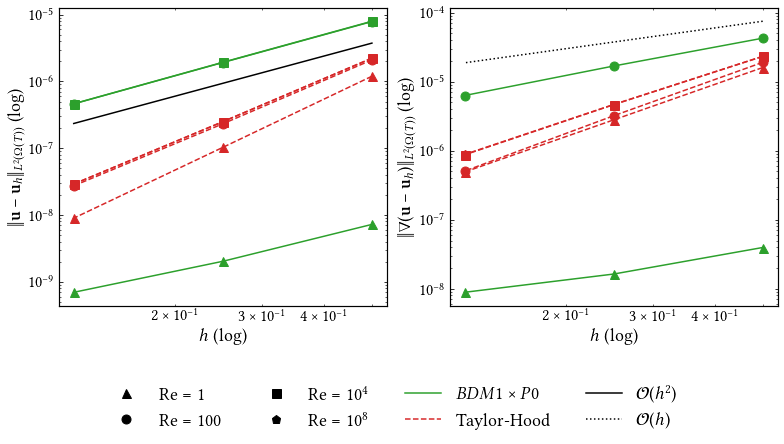

In [12]:
# symmetric boundary term (try anti-symmetric)

# lambda_boundary = 10^4
error_u_re1 = [7.199309243000801e-06, 1.935345683035227e-06, 4.909401016594056e-07]
error_p_re1 = [0.1888782915688098, 0.09581050934750163, 0.04806255676883111]
grad_error_re1 = [3.957480771859231e-05, 1.529738589894336e-05, 5.772962952401169e-06]
div_error_re1 = [1.332267629550188e-15, 3.108624468950438e-15, 8.881784197001252e-15]

error_u_re100 = [7.888935520179539e-06, 1.920164643291578e-06, 4.61210075606204e-07]
error_p_re100 = [18.88820141974344, 9.581116936966668, 4.806265555006553]
grad_error_re100 = [4.263029493161725e-05, 1.684878753116264e-05, 6.296305913545088e-06]
div_error_re100 = [7.216449660063518e-16, 2.498001805406602e-15, 7.993605777301127e-15]

error_u_re10000 = [7.972193543137059e-06, 1.935133745595306e-06, 4.628696508247376e-07]
error_p_re10000 = [1888.820558067337, 958.1117822914916, 480.626569872475]
grad_error_re10000 = [4.327375067461643e-05, 1.732684783239007e-05, 6.556471924343559e-06]
div_error_re10000 = [9.992007221626409e-16, 3.108624468950438e-15, 8.881784197001252e-15]

# Taylor-Hood
error_u_re1_th = [1.196168299604722e-06, 1.028496340794972e-07, 8.950678051173992e-09]
error_p_re1_th = [0.02635082572578167, 0.006587983674935952, 0.001647013610966152]
grad_error_re1_th = [1.60112593721145e-05, 2.792729371970957e-06, 4.903482006887579e-07]
div_error_re1_th = [3.012294248883052e-05, 7.525054545709509e-06, 1.880207111781829e-06]

error_u_re100_th = [2.101836053006325e-06, 2.319100708856945e-07, 2.731839795808907e-08]
error_p_re100_th = [2.635237850840679, 0.6588080308721301, 0.1647019671541428]
grad_error_re100_th = [1.904132452113996e-05, 3.206694768791661e-06, 5.058575981334428e-07]
div_error_re100_th = [2.345664637193323e-05, 5.210636366825838e-06, 1.196082255461306e-06]

error_u_re10000_th = [2.229902067253288e-06, 2.492675603824569e-07, 2.900148643670065e-08]
error_p_re10000_th = [263.5239161358662, 65.88081029999904, 16.47019711605976]
grad_error_re10000_th = [2.321163476401036e-05, 4.63774689679227e-06, 8.697055812339081e-07]
div_error_re10000_th = [2.78305438587978e-05, 6.258080283094714e-06, 1.512286951221853e-06]

error_u_re1e8_th = [2.231838445717843e-06, 2.496414200402821e-07, 2.906015029697585e-08]
error_p_re1e8_th = [2635239.176096915, 658808.1038892181, 164701.9712126527]
grad_error_re1e8_th = [2.327409875227847e-05, 4.666957725126285e-06, 8.813708559340498e-07]
div_error_re1e8_th = [2.789187906454549e-05, 6.280657061319417e-06, 1.527629644115791e-06]


# lambda_boundary = 1e8 (symmetric seems to be better than anti-symmetric in this case)
error_u_re1 = [8.5315377760205e-09, 5.84058060050933e-09, 7.22595940022473e-09]
grad_error_re1 = [3.820233362778679e-08, 4.362817681593681e-08, 1.088902254278388e-07]

# lambda_boundar = 1e6
error_u_re1 = [7.207556992821854e-08, 1.938264723737958e-08, 4.917873830966676e-09]
grad_error_re1 = [3.965770711273001e-07, 1.533053991171896e-07, 5.791052951271671e-08]

# lambda_boundary = 1e7
error_u_re1 = [7.21599145669288e-09, 2.022109894670297e-09, 6.935610775007949e-10]
grad_error_re1 = [3.963464142465602e-08, 1.634779363860695e-08, 8.892810327285963e-09]




h = [0.5, 0.25, 0.125]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))  

ax1.loglog(h, error_u_re1, marker='^', markersize=9, linestyle="-", color="C2")
ax1.loglog(h, error_u_re100, marker='o', markersize=9, linestyle="-", color="C2")
ax1.loglog(h, error_u_re10000, marker='s', markersize=9, linestyle="-", color="C2")

ax1.loglog(h, error_u_re1_th, marker='^', markersize=9, linestyle="--", color="C3")
ax1.loglog(h, error_u_re100_th, marker='o', markersize=9, linestyle="--", color="C3")
ax1.loglog(h, error_u_re10000_th, marker='s', markersize=9, linestyle="--", color="C3")
ax1.loglog(h, error_u_re1e8_th, marker='p', markersize=9, linestyle="--", color="C3")

ax1.loglog([], [], linestyle="None", label=r"$\text{Re}=1$", marker='^', markersize=9, color="black")
ax1.loglog([], [], linestyle="None", label=r"$\text{Re}=100$", marker='o', markersize=9, color="black")
ax1.loglog([], [], linestyle="None", label=r"$\text{Re}=10^4$", marker='s', markersize=9, color="black")
ax1.loglog([], [], linestyle="None", label=r"$\text{Re}=10^8$", marker='p', markersize=9, color="black")

ax1.loglog([], [], linestyle="-", label=r"$BDM1\times P0$", color="C2")
ax1.loglog([], [], linestyle="--", label=r"Taylor-Hood", color="C3")


ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|\mathbf{u}-\mathbf{u}_h\|_{L^2(\Omega(T))}$ (log)")

ax2.loglog(h, grad_error_re1, marker='^', markersize=9, linestyle="-", color="C2")
ax2.loglog(h, grad_error_re100, marker='o', markersize=9, linestyle="-", color="C2")

ax2.loglog(h, grad_error_re1_th, marker='^', markersize=9, linestyle="--", color="C3")
ax2.loglog(h, grad_error_re100_th, marker='o', markersize=9, linestyle="--", color="C3")
ax2.loglog(h, grad_error_re10000_th, marker='s', markersize=9, linestyle="--", color="C3")
ax2.loglog(h, grad_error_re1e8_th, marker='p', markersize=9, linestyle="--", color="C3")

ax2.set_xlabel(r"$h$ (log)")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"$\|\nabla (\mathbf{u}-\mathbf{u}_h)\|_{L^2(\Omega(T))}$ (log)")
#ax2.legend()

ax1.loglog(h, 1.5e-5*np.power(h, 2),label=r"$\mathcal{O}(h^2)$", linestyle="-", color="black")   
ax2.loglog(h, 1.5e-4*np.power(h, 1),label=r"$\mathcal{O}(h)$", linestyle=":", color="black") 

handles, labels = [(a + b) for a, b in zip(ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels())]
fig.legend(handles, labels, loc='lower center', ncols=4, bbox_to_anchor=(0.5, -0.25), fontsize=18, frameon=False)

fig.tight_layout()
plt.show()


### Strong boundary conditions

In [ ]:


h = [0.5, 0.25, 0.125]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 5))

ax1.loglog(h, 1.5e-5*np.power(h, 2),label=r"$\mathcal{O}(h^2)$", linestyle="-", color="black")   
ax1.loglog(h, error_u_re1, label= r"$\text{Re} = 1$", marker='^', markersize=9, linestyle="-", color="C2")
ax1.loglog(h, error_u_re100, label= r"$\text{Re} = 100$", marker='o', markersize=9, linestyle="-", color="C2")
ax1.loglog(h, error_u_re10000, label= r"$\text{Re} = 10 000$", marker='s', markersize=9, linestyle="-", color="C2")

ax1.loglog(h, error_u_re1_th, label= r"$\text{Re} = 1$, Taylor-Hood", marker='^', markersize=9, linestyle="--", color="C3")
ax1.loglog(h, error_u_re100_th, label= r"$\text{Re} = 100$, Taylor-Hood", marker='o', markersize=9, linestyle="--", color="C3")
ax1.loglog(h, error_u_re10000_th, label= r"$\text{Re} = 10 000$, Taylor-Hood", marker='s', markersize=9, linestyle="--", color="C3")
ax1.loglog(h, error_u_re1e8_th, label= r"$\text{Re} = 10^8$, Taylor-Hood", marker='p', markersize=9, linestyle="--", color="C3")

ax1.set_xlabel(r"$h$ (log)")
ax1.tick_params(axis='both', which='major')
ax1.set_ylabel(r"$\|\mathbf{u}-\mathbf{u}_h\|_{L^2(\Omega(T))}$ (log)")
ax1.legend()

ax2.loglog(h, 1.5e-4*np.power(h, 1),label=r"$\mathcal{O}(h)$", linestyle=":", color="black")   
ax2.loglog(h, grad_error_re1, label= r"$\text{Re} = 1$", marker='^', markersize=9, linestyle="-", color="C2")
ax2.loglog(h, grad_error_re100, label= r"$\text{Re} = 100$", marker='o', markersize=9, linestyle="-", color="C2")

ax2.loglog(h, grad_error_re1_th, label= r"$\text{Re} = 1$, Taylor-Hood", marker='^', markersize=9, linestyle="--", color="C3")
ax2.loglog(h, grad_error_re100_th, label= r"$\text{Re} = 100$, Taylor-Hood", marker='o', markersize=9, linestyle="--", color="C3")
ax2.loglog(h, grad_error_re10000_th, label= r"$\text{Re} = 10^4$, Taylor-Hood", marker='s', markersize=9, linestyle="--", color="C3")
ax2.loglog(h, grad_error_re1e8_th, label= r"$\text{Re} = 10^8$, Taylor-Hood", marker='p', markersize=9, linestyle="--", color="C3")

ax2.set_xlabel(r"$h$ (log)")
ax2.tick_params(axis='both', which='major')
ax2.set_ylabel(r"$\|\nabla (\mathbf{u}-\mathbf{u}_h)\|_{L^2(\Omega(T))}$ (log)")
#ax2.legend()

fig.tight_layout()
plt.show()
